In [2]:
#Gerekli kütüphane import işlemi
!pip install -q sounddevice
!pip install -q mediapipe==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 36.4 MB/s eta 0:00:00


In [26]:
#Kütüphane tanımlama
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt


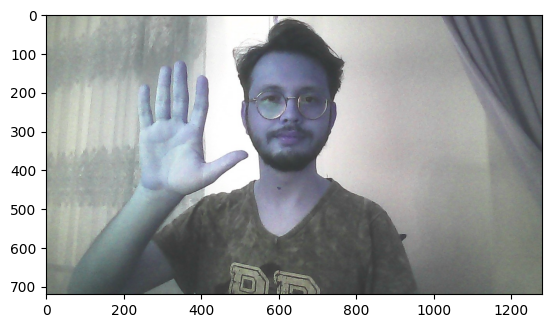

In [27]:
#El resmi yükleme
img = cv2.imread("img/sagEl.jpg")
plt.imshow(img)

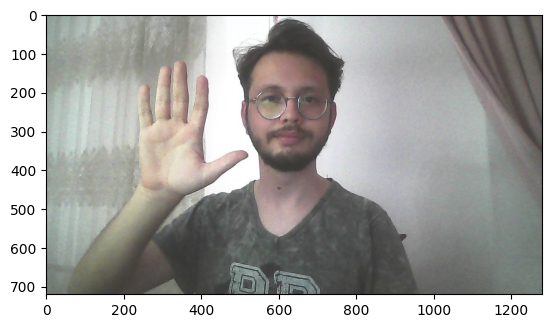

In [28]:
#RGB Çevirme
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

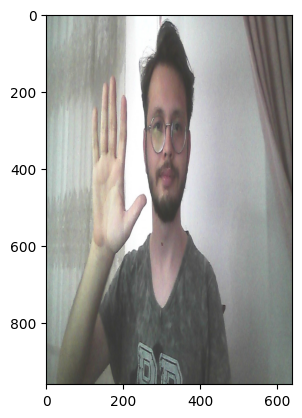

In [30]:
#Resmin boyutunu 960x640 olarak ayarlama
img = cv2.resize(img, (640,960))
plt.imshow(img)

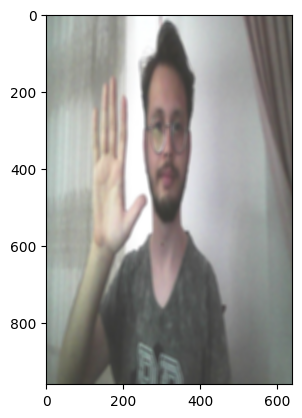

In [31]:
#Resme 10x10 filtre uygulama
img = cv2.blur(img,(10,10))
plt.imshow(img)

In [32]:
cv2.imwrite('img/el_tespit_odev.jpg',img)

True

In [33]:
img = mp.Image.create_from_file("img/el_tespit_odev.jpg")

In [34]:
MARGIN=10 #metnin üst köşesinden elin sınırına olan mesafe
FONT_SIZE = 3 #yazı tipi boyutu
FONT_THICKNESS = 2 #yazı kalınlığı
HANDEDNESS_TEXT_COLOR = (0,255,0) #  yeşil renk

In [36]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [37]:
img = mp.Image.create_from_file("img/sagEl.jpg")
base_options = python.BaseOptions(model_asset_path="hand_landmarker.task")
options=vision.HandLandmarkerOptions(base_options=base_options,num_hands=2)
detector=vision.HandLandmarker.create_from_options(options)
detection_result = detector.detect(img)

In [38]:
detection_result

HandLandmarkerResult(handedness=[[Category(index=0, score=0.9822669625282288, display_name='Left', category_name='Left')]], hand_landmarks=[[NormalizedLandmark(x=0.22943586111068726, y=0.6242628693580627, z=1.3708427104575094e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.2788015604019165, y=0.6145309209823608, z=-0.027782227843999863, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3256791830062866, y=0.572924792766571, z=-0.0381631925702095, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.36194831132888794, y=0.5285758972167969, z=-0.04519232362508774, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.39266544580459595, y=0.5089990496635437, z=-0.05260948836803436, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.29511719942092896, y=0.4272650182247162, z=-0.023573582991957664, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.30915987491607666, y=0.3385775089263916, z=-0.03584558889269829, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.312

In [39]:
def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

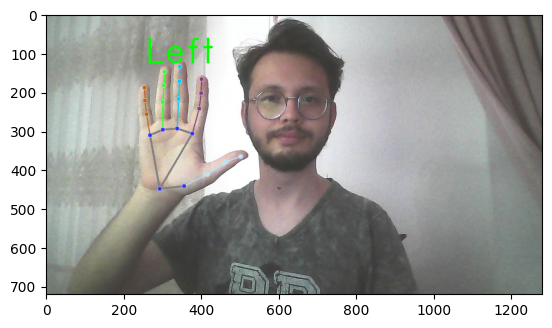

In [40]:
#Resmin El Tespiti Yapılmasını Gerçekleştirme
annotated_image = draw_landmarks_on_image(img.numpy_view(),detection_result)
plt.figure()
plt.imshow(annotated_image)

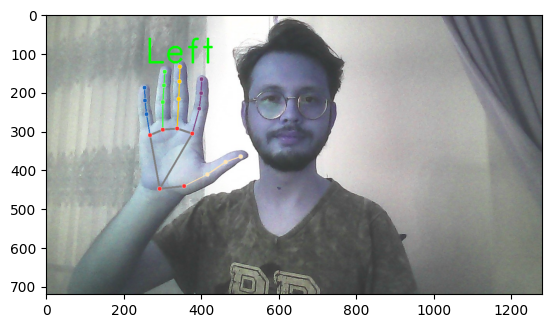

In [41]:
#Resmi BGR formatına çevirme
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
plt.imshow(annotated_image)

In [42]:
#Kaydetme İşlemi
cv2.imwrite("img/el_tespit_odev.jpg",annotated_image)

True